# Part 1


**Regularization in Deep Learning:**


**Importance of Regularization:**

Regularization is important in deep learning for several reasons:

1. **Overfitting Prevention:** Deep neural networks, with their large number of parameters, are highly flexible and can memorize the training data if not constrained. Regularization helps prevent this overfitting problem.

2. **Improved Generalization:** By preventing overfitting, regularization techniques improve a model's ability to generalize to new, unseen data, leading to better real-world performance.

3. **Stabilizing Training:** Regularization can help stabilize training, making it easier to find model parameters that converge to a global minimum.

**Bias-Variance Tradeoff and Regularization:**

The bias-variance tradeoff is a fundamental concept in machine learning. It refers to the tradeoff between two types of errors a model can make:

- **Bias (Underfitting):** A model with high bias is too simple to capture the underlying patterns in the data. It underfits the data, resulting in poor performance on both the training and test datasets.

- **Variance (Overfitting):** A model with high variance is too complex and fits the training data too closely, capturing noise. It overfits the data, resulting in good training performance but poor test performance.

Regularization techniques aim to strike a balance between bias and variance by introducing constraints on the model's complexity, discouraging it from fitting the training data too closely.

**L1 and L2 Regularization:**

1. **L1 Regularization (Lasso):** L1 regularization adds a penalty to the loss function based on the absolute values of the model's weights. It encourages some weights to become exactly zero, effectively leading to feature selection. L1 regularization is useful when you suspect that some features are irrelevant or redundant.

   The L1 penalty term is added to the loss function as: \(\lambda \sum |w_i|\), where \(\lambda\) is the regularization strength and \(w_i\) are the model weights.

2. **L2 Regularization (Ridge):** L2 regularization adds a penalty to the loss function based on the squared values of the model's weights. It discourages any weight from becoming too large. L2 regularization is effective in preventing large weights, which can lead to overfitting.

   The L2 penalty term is added to the loss function as: \(\lambda \sum w_i^2\), where \(\lambda\) is the regularization strength and \(w_i\) are the model weights.

**Role of Regularization in Preventing Overfitting:**

Regularization plays a crucial role in preventing overfitting and improving the generalization of deep learning models by:

1. Reducing Model Complexity: By introducing penalties on model weights, regularization discourages the model from fitting the training data too closely, which reduces its complexity.

2. Encouraging Simplicity: Regularization encourages the model to be as simple as possible while still capturing the underlying patterns in the data, thus improving its generalization.

3. Improving Stability: Regularization techniques help stabilize the training process by preventing rapid convergence to an overfit solution.



# Part 2


**Dropout Regularization:**


**How Dropout Reduces Overfitting:**

1. **Reduced Co-Adaptation:** Dropout discourages co-adaptation of neurons. When neurons are dropped out during training, the network cannot rely too heavily on any specific set of neurons. This encourages a more distributed and robust representation.

2. **Ensemble Learning:** By creating different subnetworks in each training iteration, dropout effectively implements ensemble learning. This ensemble of models improves generalization because it averages out errors and uncertainties from different subnetworks.

3. **Preventing Complex Co-Adaptations:** Dropout acts as a regularizer by preventing the model from learning complex and potentially noisy patterns in the training data. It forces the network to focus on the most important and general features.

**Impact of Dropout on Model Training and Inference:**

During training, dropout randomly deactivates neurons in each forward and backward pass, which adds noise to the training process. This noise helps the model generalize better but can slow down training since each forward-backward pass is different. Inference (testing or using the trained model) does not involve dropout. Instead, the output of each neuron is scaled by a factor equal to the dropout rate. This scaling during inference helps maintain the expected output, which matches the behavior of the ensemble of subnetworks.

**Early Stopping as Regularization:**

Early stopping is a form of regularization that involves monitoring the model's performance on a validation dataset during training. Training is stopped when the validation performance starts to degrade, indicating overfitting. The model's weights at the point of early stopping are typically saved as they correspond to the best trade-off between training and validation performance.

Early stopping helps prevent overfitting by finding the optimal point at which the model has learned to generalize well but has not overfit the training data. It does so by terminating training before the model starts to memorize the training data.

**Batch Normalization as Regularization:**

Batch normalization (Batch Norm) is another form of regularization. While its primary purpose is to stabilize training, it also has a regularizing effect. Batch Norm works by normalizing the activations of each layer based on statistics from the current mini-batch. This normalization reduces the likelihood of activations becoming too large or too small during training.

The role of Batch Norm in preventing overfitting can be summarized as follows:

1. **Reducing Internal Covariate Shift:** Batch Norm reduces the internal covariate shift by standardizing activations within a layer. This helps stabilize training and reduce the chances of the model overfitting the training data.

2. **Enabling Higher Learning Rates:** With Batch Norm, you can use higher learning rates during training, which can lead to faster convergence. Faster convergence helps prevent overfitting.

3. **Regularization Effect:** The noise introduced by Batch Norm during training acts as a form of regularization, making the model more robust.



# Part 3

In [2]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras


In [3]:
mnist = keras.datasets.mnist

(X_train , y_train) , (X_test , y_test) = mnist.load_data()

In [4]:
X_valid , X_train = X_train[:5000]/255. , X_train[5000:]/255.
y_valid , y_train = y_train[:5000]/255. , y_train[5000:]/255.

X_test = X_test / 255.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]  , name = "inputLayer"),
    tf.keras.layers.Dense(500 , activation='relu',name = "hiddenLayer1"),
    tf.keras.layers.Dense(300 , activation='relu' , name = "hiddenLayer2"),
    tf.keras.layers.Dense(100 , activation='relu' , name = "hiddenLayer3"),
    tf.keras.layers.Dense(10 , activation='softmax' , name = "Outputlayer"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 500)               392500    
                                                                 
 hiddenLayer2 (Dense)        (None, 300)               150300    
                                                                 
 hiddenLayer3 (Dense)        (None, 100)               30100     
                                                                 
 Outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 573910 (2.19 MB)
Trainable params: 573910 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
loss_function = "sparse_categorical_crossentropy"
optimizer = 'adam'
metrics = ['accuracy']

model.compile(loss = loss_function, optimizer = optimizer , metrics = metrics)

In [7]:
epochs = 10
validation_set = (X_valid , y_valid)

history1 = model.fit(X_train , y_train , epochs=epochs , validation_data=validation_set , batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.0023 - accuracy: 0.0989 - val_loss: 4.7684e-10 - val_accuracy: 0.0958
Epoch 2/10
1719/1719 [==============================] - 17s 10ms/step - loss: 6.3506e-10 - accuracy: 0.0990 - val_loss: 4.5300e-10 - val_accuracy: 0.0958
Epoch 3/10
1719/1719 [==============================] - 16s 10ms/step - loss: 6.2639e-10 - accuracy: 0.0990 - val_loss: 4.2915e-10 - val_accuracy: 0.0958
Epoch 4/10
1719/1719 [==============================] - 17s 10ms/step - loss: 6.0688e-10 - accuracy: 0.0990 - val_loss: 4.2915e-10 - val_accuracy: 0.0958
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 5.8087e-10 - accuracy: 0.0990 - val_loss: 4.0531e-10 - val_accuracy: 0.0958
Epoch 6/10
1719/1719 [==============================] - 18s 11ms/step - loss: 5.0718e-10 - accuracy: 0.0990 - val_loss: 3.5763e-10 - val_accuracy: 0.0958
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 4.

In [9]:
model_dp = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]  , name = "inputLayer"),
    tf.keras.layers.Dense(500 , activation='relu',name = "hiddenLayer1"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300 , activation='relu' , name = "hiddenLayer2"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100 , activation='relu' , name = "hiddenLayer3"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10 , activation='softmax' , name = "Outputlayer"),
])



model_dp.compile(loss = loss_function, optimizer = optimizer , metrics = metrics)

history_dp = model_dp.fit(X_train , y_train , epochs=epochs , validation_data=validation_set , batch_size=32)



Epoch 1/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0042 - accuracy: 0.0989 - val_loss: 3.7432e-09 - val_accuracy: 0.0958
Epoch 2/10
1719/1719 [==============================] - 20s 12ms/step - loss: 2.0137e-08 - accuracy: 0.0990 - val_loss: 3.4094e-09 - val_accuracy: 0.0958
Epoch 3/10
1719/1719 [==============================] - 22s 13ms/step - loss: 2.4188e-08 - accuracy: 0.0990 - val_loss: 2.6941e-09 - val_accuracy: 0.0958
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 1.6270e-08 - accuracy: 0.0990 - val_loss: 1.8120e-09 - val_accuracy: 0.0958
Epoch 5/10
1719/1719 [==============================] - 22s 13ms/step - loss: 1.1916e-08 - accuracy: 0.0990 - val_loss: 7.8678e-10 - val_accuracy: 0.0958
Epoch 6/10
1719/1719 [==============================] - 19s 11ms/step - loss: 6.9421e-09 - accuracy: 0.0990 - val_loss: 2.3842e-10 - val_accuracy: 0.0958
Epoch 7/10
1719/1719 [==============================] - 23s 14ms/step - loss: 1.

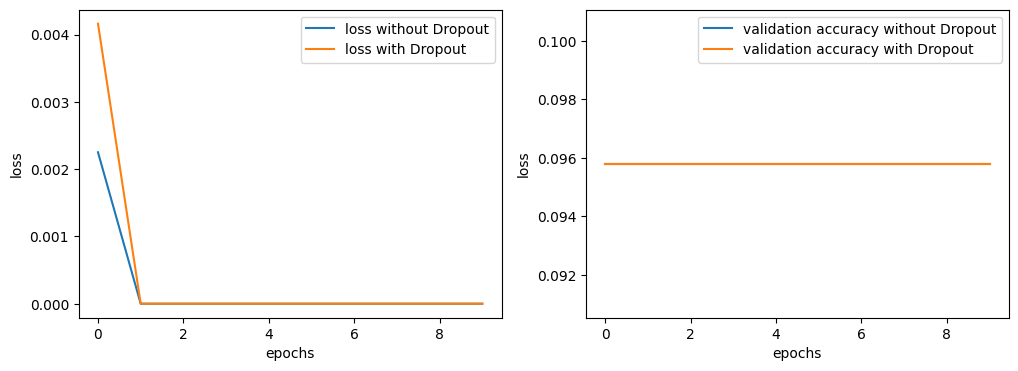

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history1.history["loss"] , label = "loss without Dropout")
plt.plot(history_dp.history["loss"] , label = "loss with Dropout")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history1.history["val_accuracy"] , label = "validation accuracy without Dropout")
plt.plot(history_dp.history["val_accuracy"] , label = "validation accuracy with Dropout")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
